In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
disk_loc = '/home/amalpjose/git/earth_proj/earth_proj/ibtracs.ALL.list.v04r00.csv'

h_data = pd.read_csv(disk_loc, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
h_data.head(3)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN


In [3]:
h_data.columns #labels

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES'],
      dtype='object')

In [4]:
h_data.index

RangeIndex(start=0, stop=705009, step=1)

In [5]:
h_data['BASIN'].value_counts()

WP    235885
SI    160397
NA    124814
SP     67045
EP     61404
NI     55345
SA       119
Name: BASIN, dtype: int64

124814 North Atlantic hurricanes in the dataset.

retrieving the unique values in basin, subbasin, and nature

In [6]:

h_data['BASIN'].unique(), h_data['SUBBASIN'].unique(), h_data['NATURE'].unique()

(array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object),
 array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object),
 array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object))

In [7]:
#renaming two columns

new_map = {
     "WMO_WIND": "WIND",
     "WMO_PRES": "PRES",
 }


In [8]:
h_data = h_data.rename(columns=new_map)

Get the 10 largest rows in the dataset by WIND

In [9]:
h_data.nlargest(10, 'WIND').head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666348,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666346,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666350,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
428030,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0


Group the data on SID and get the 10 largest hurricanes by WIND

In [10]:
h_data.groupby('SID')['WIND'].count().nlargest(10).head()

SID
1973325S09091    137
1899215N12329    133
1994222N11267    121
1971249N26289    118
2015364S09190    109
Name: WIND, dtype: int64

ploting the top 20 hurricanes with highest magnitude

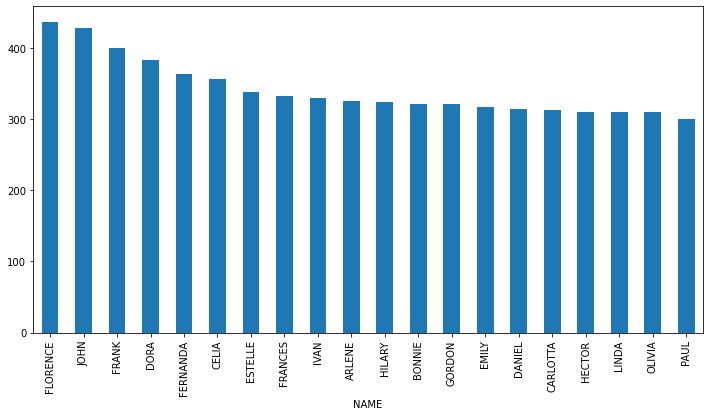

In [11]:
h_data.groupby('NAME')['WIND'].count().nlargest(20).plot(kind='bar', figsize=(12,6));

bar chart of the wind speed of the 20 strongest-wind hurricanes (below)

<AxesSubplot:xlabel='BASIN'>

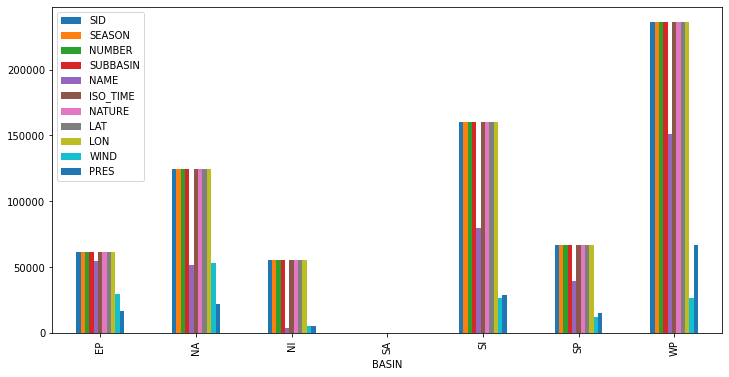

In [12]:
h_data.groupby('BASIN').count().plot(kind='bar', figsize=(12,6))

In [13]:
h_data.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Plot the count of all datapoints by Basin

In [14]:
uni_basins = h_data['BASIN'].unique()

In [15]:
count_per_basin = h_data.groupby('BASIN')['NAME'].count().unique()

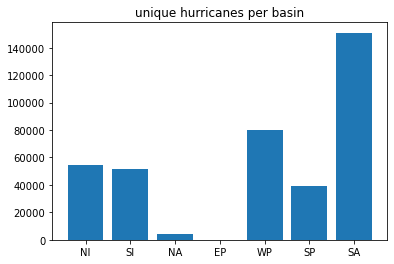

In [16]:
plt.bar(uni_basins, count_per_basin)
plt.title('unique hurricanes per basin');

In [17]:
unique_by_basin = h_data.groupby('NAME')['BASIN'].count().unique()

In [18]:
print(unique_by_basin)

[   9   94  642  164  123   65   69  238  300  205   43   91  169   40
  119   87   77  222  268  265  454  121  106 1582  140  160   29   57
   71   18   56  244   95  145   39  114  409  635  117   93   51   21
  139  189 1519   83   41   53   63  273   78  232  109  538  105  166
  151  201  148  113   49  186  173   54   62   72 1109    3  102  550
   73  103  100  107   25  369  128   89  295   27  549  228  112  581
   55  272  319  277  161  419   82   33  633   15   99  490   79  197
  292   98  343   81  234   23  414   59  332  224  200  780   45  370
  271  266   67  215  249  240  472  196  253   97   75  157  236  261
  115   61  825   80  634 1090  133  101  233  175  645  158 1351  341
  194   84  427  683  260   11  153  163  576  191  311  393  155  135
  340  137   37   85  595  138  223  425   35  521  297  264  282  131
  211  143  129  281   47  162  270  116   38  872 1392  567   86  193
  246  125  464   74  329  710   10  118  359  168  410  126  402  291
  314 

In [19]:
len(unique_by_basin)

548


hexbin of the location of datapoints in Latitude and Longitude

"ax.set_xlabel('LAT')\nax.set_ylabel('LON')"

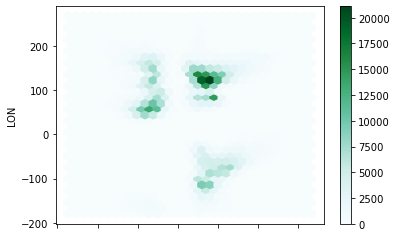

In [20]:
#ax = 
h_data.plot.hexbin('LAT', 'LON', gridsize=30);


"""ax.set_xlabel('LAT')
ax.set_ylabel('LON')"""

simple hexbin with matplotlib

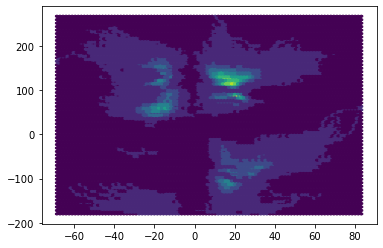

In [21]:
plt.hexbin(h_data['LAT'], h_data['LON'], bins=10)

Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

In [47]:
gb = h_data.groupby('NAME')

In [48]:
gr_gb = gb.groups

In [76]:
katri = gb.get_group('KATRINA')
katri

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
332525,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 00:00:00,TS,17.8000,-107.2000,45.0,NaN
332526,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 03:00:00,TS,17.9859,-107.5960,NaN,NaN
332527,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 06:00:00,TS,18.2120,-107.9900,45.0,NaN
332528,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 09:00:00,TS,18.5131,-108.3860,NaN,NaN
332529,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 12:00:00,TS,18.9000,-108.8000,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
604198,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
604199,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
604200,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
604201,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


In [83]:
katri_2005 = katri.groupby('SID').groups

In [84]:
gb = h_data.groupby('SID')

In [85]:
gr_gb = gb.groups

In [87]:
katri_2005 = gb.get_group('2005236N23285')
katri_2005

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
604139,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1000,-75.1000,30.0,1008.0
604140,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2476,-75.4049,NaN,NaN
604141,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4000,-75.7000,30.0,1007.0
604142,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.5700,-75.9726,NaN,NaN
604143,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8000,-76.2000,30.0,1007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
604198,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
604199,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
604200,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
604201,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


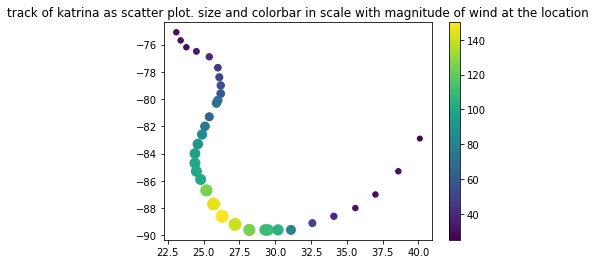

In [100]:
#scatter plot of the locations of katrina (2005) color of dots and size in propotion to magnitude at the location

plt.scatter(katri_2005['LAT'], katri_2005['LON'], c=katri_2005['WIND'], s=katri_2005['WIND'])
plt.colorbar()
plt.title('track of katrina as scatter plot. size and colorbar in scale with magnitude of wind at the location');

### Setting Time as the index on the original dataframe

In [102]:
dta_reindx = h_data.set_index('ISO_TIME')

In [103]:
dta_reindx

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16 06:00:00,2022073S14103,2022,17,SI,WA,BILLY,NR,-18.1000,93.6000,NaN,NaN
2022-03-16 09:00:00,2022073S14103,2022,17,SI,WA,BILLY,NR,-18.5774,93.1980,NaN,NaN
2022-03-16 12:00:00,2022073S14103,2022,17,SI,WA,BILLY,NR,-19.1000,92.9000,NaN,NaN


In [104]:
dta_reindx.groupby('SEASON').count()

,SID,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
SEASON,,,,,,,,,,
1842,65,65,65,65,0,65,65,65,0,0
1845,25,25,25,25,0,25,25,25,0,0
1848,340,340,340,340,0,340,340,340,0,0
1851,801,801,801,801,0,801,801,801,98,0
1852,891,891,891,891,0,891,891,891,134,1
...,...,...,...,...,...,...,...,...,...,...
2018,7198,7198,7198,7198,6848,7198,7198,7198,2987,3453
2019,7056,7056,7056,7056,6557,7056,7056,7056,2590,3010
2020,6141,6141,6141,6141,5708,6141,6141,6141,2456,2808


In [108]:
type(dta_reindx.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [124]:
#count of all datapoints per year with resampling

count_of_dp = dta_reindx.resample('Y').count()

In [118]:
count_of_dp.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-12-31,65,65,65,65,65,0,65,65,65,0,0
1843-12-31,0,0,0,0,0,0,0,0,0,0,0
1844-12-31,0,0,0,0,0,0,0,0,0,0,0
1845-12-31,25,25,25,25,25,0,25,25,25,0,0
1846-12-31,0,0,0,0,0,0,0,0,0,0,0


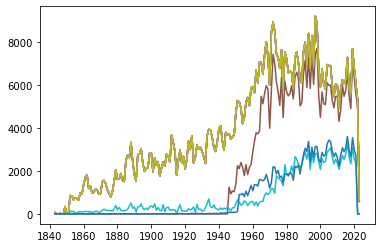

In [128]:
plt.plot(count_of_dp);

In [129]:
dta_reindx.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN


grouping and filtering to get the data from north atlantinc in 2005

In [147]:
grp = dta_reindx.groupby('BASIN')

In [144]:
type(grp)

pandas.core.groupby.generic.SeriesGroupBy

to see the groups in the groupby obj

In [149]:
groups = list(grp.groups)

In [153]:
groups

['EP', 'NA', 'NI', 'SA', 'SI', 'SP', 'WP']

In [156]:
na = grp.get_group(('NA'))

In [157]:
type(na)

pandas.core.frame.DataFrame

In [158]:
#masking and filtering

is_2005 = na['SEASON']==2005 #masking for 2005
is_2005.head(3)

ISO_TIME
1851-06-23 12:00:00    False
1851-06-23 15:00:00    False
1851-06-23 18:00:00    False
Name: SEASON, dtype: bool

In [160]:
na_2005 = na[is_2005] #filtering
na_2005

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
2005-06-08 18:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,16.9000,-84.0000,25.0,1004.0
2005-06-08 21:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.1200,-83.9425,NaN,NaN
2005-06-09 00:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.4000,-83.9000,30.0,1003.0
2005-06-09 03:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.7775,-83.8850,NaN,NaN
2005-06-09 06:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,18.2000,-83.9000,35.0,1003.0
...,...,...,...,...,...,...,...,...,...,...,...
2006-01-07 06:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.2000,-52.7000,25.0,1012.0
2006-01-07 09:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.4249,-53.4364,NaN,NaN
2006-01-07 12:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.8000,-54.2000,25.0,1014.0


plotting all tracks from 2005 in North Atlantic

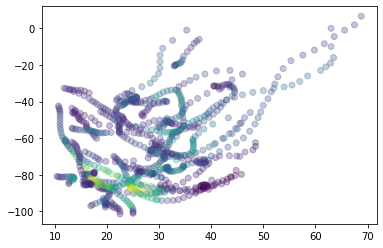

In [163]:
plt.scatter(na_2005['LAT'], na_2005['LON'], c=na_2005['WIND'], alpha=0.3);

### Filtering the original df for data from 1970 onward for N. Atlantic

In [164]:
grp2 = dta_reindx.groupby('BASIN')

In [165]:
na2 = grp2.get_group(('NA'))

In [166]:
gt_1970 = na2['SEASON']>=1970 #masking >= 1970

In [168]:
na_gt_1970 = na2[gt_1970] #filtering

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5000,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.6112,-79.1038,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.7500,-79.2500,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.9288,-79.4637,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1000,-79.7000,25.0,NaN


Plot the number of datapoints per day from this filtered dataframe

In [286]:
daily_cnt = na_gt_1970.groupby(na_gt_1970.index.day).count()

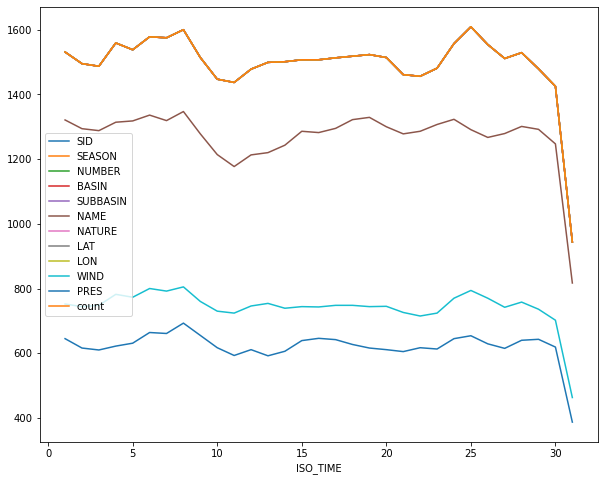

In [292]:
daily_cnt.plot(figsize=(10,8));

In [240]:
#another way

na_gt_1970['count'] = 1

In [243]:
daily_c = na_gt_1970.groupby(na_gt_1970.index.day).aggregate({'count': 'sum'})

In [248]:
daily_c.size

31

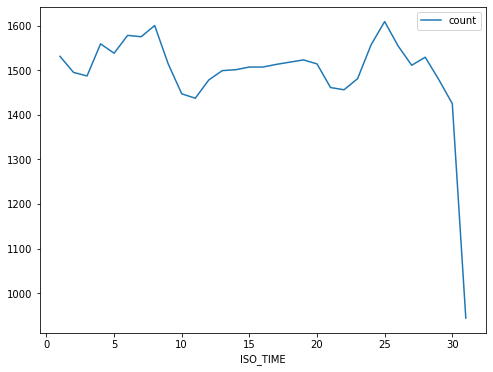

In [259]:
daily_c.plot(figsize=(8,6)); #we get the same thing

Calculate the climatology of datapoint counts as a function of dayofyear

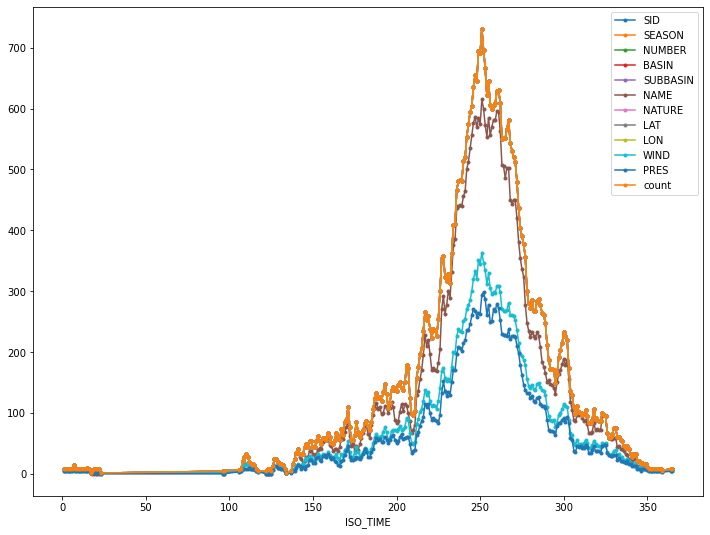

In [281]:
daily_clim = na_gt_1970.groupby(na_gt_1970.index.dayofyear).count()

daily_clim.plot(figsize=(12,9), marker='.');

daily_climatology = na_gt_1970.groupby(na_gt_1970.index.dayofyear).aggregate({'count': 'sum'})

daily_climatology.plot(figsize=(12,9), marker='.');

In [278]:
daily_climatology.head(2)

,count
ISO_TIME,
1,8
2,8


daily_clim_mstd = na_gt_1970.groupby(na_gt_1970.index.dayofyear).aggregate({'count': 'mean',
                                                                      'count': 'std'})

daily_clim_mstd.plot(figsize=(8,6), marker='.')

### anomaly evaluation

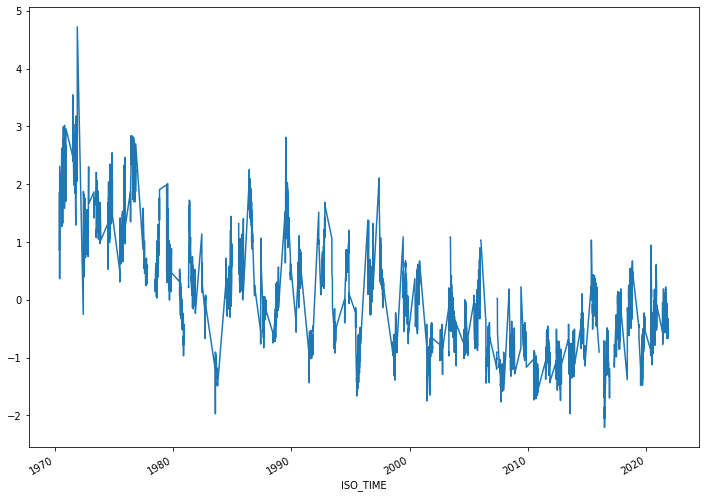

In [299]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly = na_gt_1970['NUMBER'].groupby(na_gt_1970.index.dayofyear).transform(standardize)
anomaly.plot(figsize=(12,9));